# Introduction
Introduce the project, and your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.
Through this project, we came up with a way of how to strategically identify the best neighborhood in Pittsburgh. Being that there are multiple ways to interpret what's considered the "best", we interpreted this in terms of safety (crims, disasters) and stability (income). This is because for a neighborhood to be considered a quality place to live, it must be safe and stable. (finish intro)

# The Metric
We are measuring the total number of `arrests`, `fire incidents`, and the `average income` for each neighborhood in Pittsburgh given the following datasets:
* police_arrest.csv
    * https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f 
* Fire Incidencts.csv
    * https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02 
* income.csv
    * link to site
* income_individual.csv
    * link to site

Based on all of these datasets, we gather information specifically regarding the neighborhoods given the metrics we chose.

## The Data: Arrests

In [694]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [696]:
# Import data
arrests = pd.read_csv('police_arrest.csv', index_col='_id')
arrests.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
_id,,,,,,,,,,,,,,,,
1,1975272,16158872,42.00,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.00,8.00,2.00,-79.95,40.45
2,1974456,16144120,31.00,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.00,NaN,NaN,-80.09,40.44
3,1974466,16144165,63.00,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.00,9.00,2.00,-79.89,40.49
4,1974550,16145257,25.00,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.00,1.00,1.00,-80.00,40.45
5,1974596,16145962,25.00,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.00,2.00,5.00,-80.05,40.45


### Parse and Organize Data

In [699]:
arrests = arrests.rename(columns={
    'INCIDENTNEIGHBORHOOD': 'Neighborhood'
})
arrests = arrests[arrests['Neighborhood'] != 'Outside City']
arrests = arrests.groupby('Neighborhood').size().reset_index(name='Arrests')
arrests = arrests.sort_values(by='Arrests', ascending=True)
arrests

,Neighborhood,Arrests
57,Mt. Oliver Neighborhood,2
90,Troy Hill-Herrs Island,6
56,Mt. Oliver Boro,18
19,Central Northside,23
72,Ridgemont,37
...,...,...
43,Homewood South,2090
26,East Allegheny,2217
15,Carrick,2352
77,South Side Flats,3497


In [701]:
# Creates another dataframe for graphing
arrests_res = pd.DataFrame({
    'Neighborhood': arrests['Neighborhood'],
    'Arrests': arrests['Arrests']
})
# Set the neighborhood column as index
arrests_res = arrests_res.set_index('Neighborhood')
arrests_res

,Arrests
Neighborhood,
Mt. Oliver Neighborhood,2
Troy Hill-Herrs Island,6
Mt. Oliver Boro,18
Central Northside,23
Ridgemont,37
...,...
Homewood South,2090
East Allegheny,2217
Carrick,2352


### Plot Data

Text(0.5, 1.0, 'Police Arrest Records by Neighborhood')

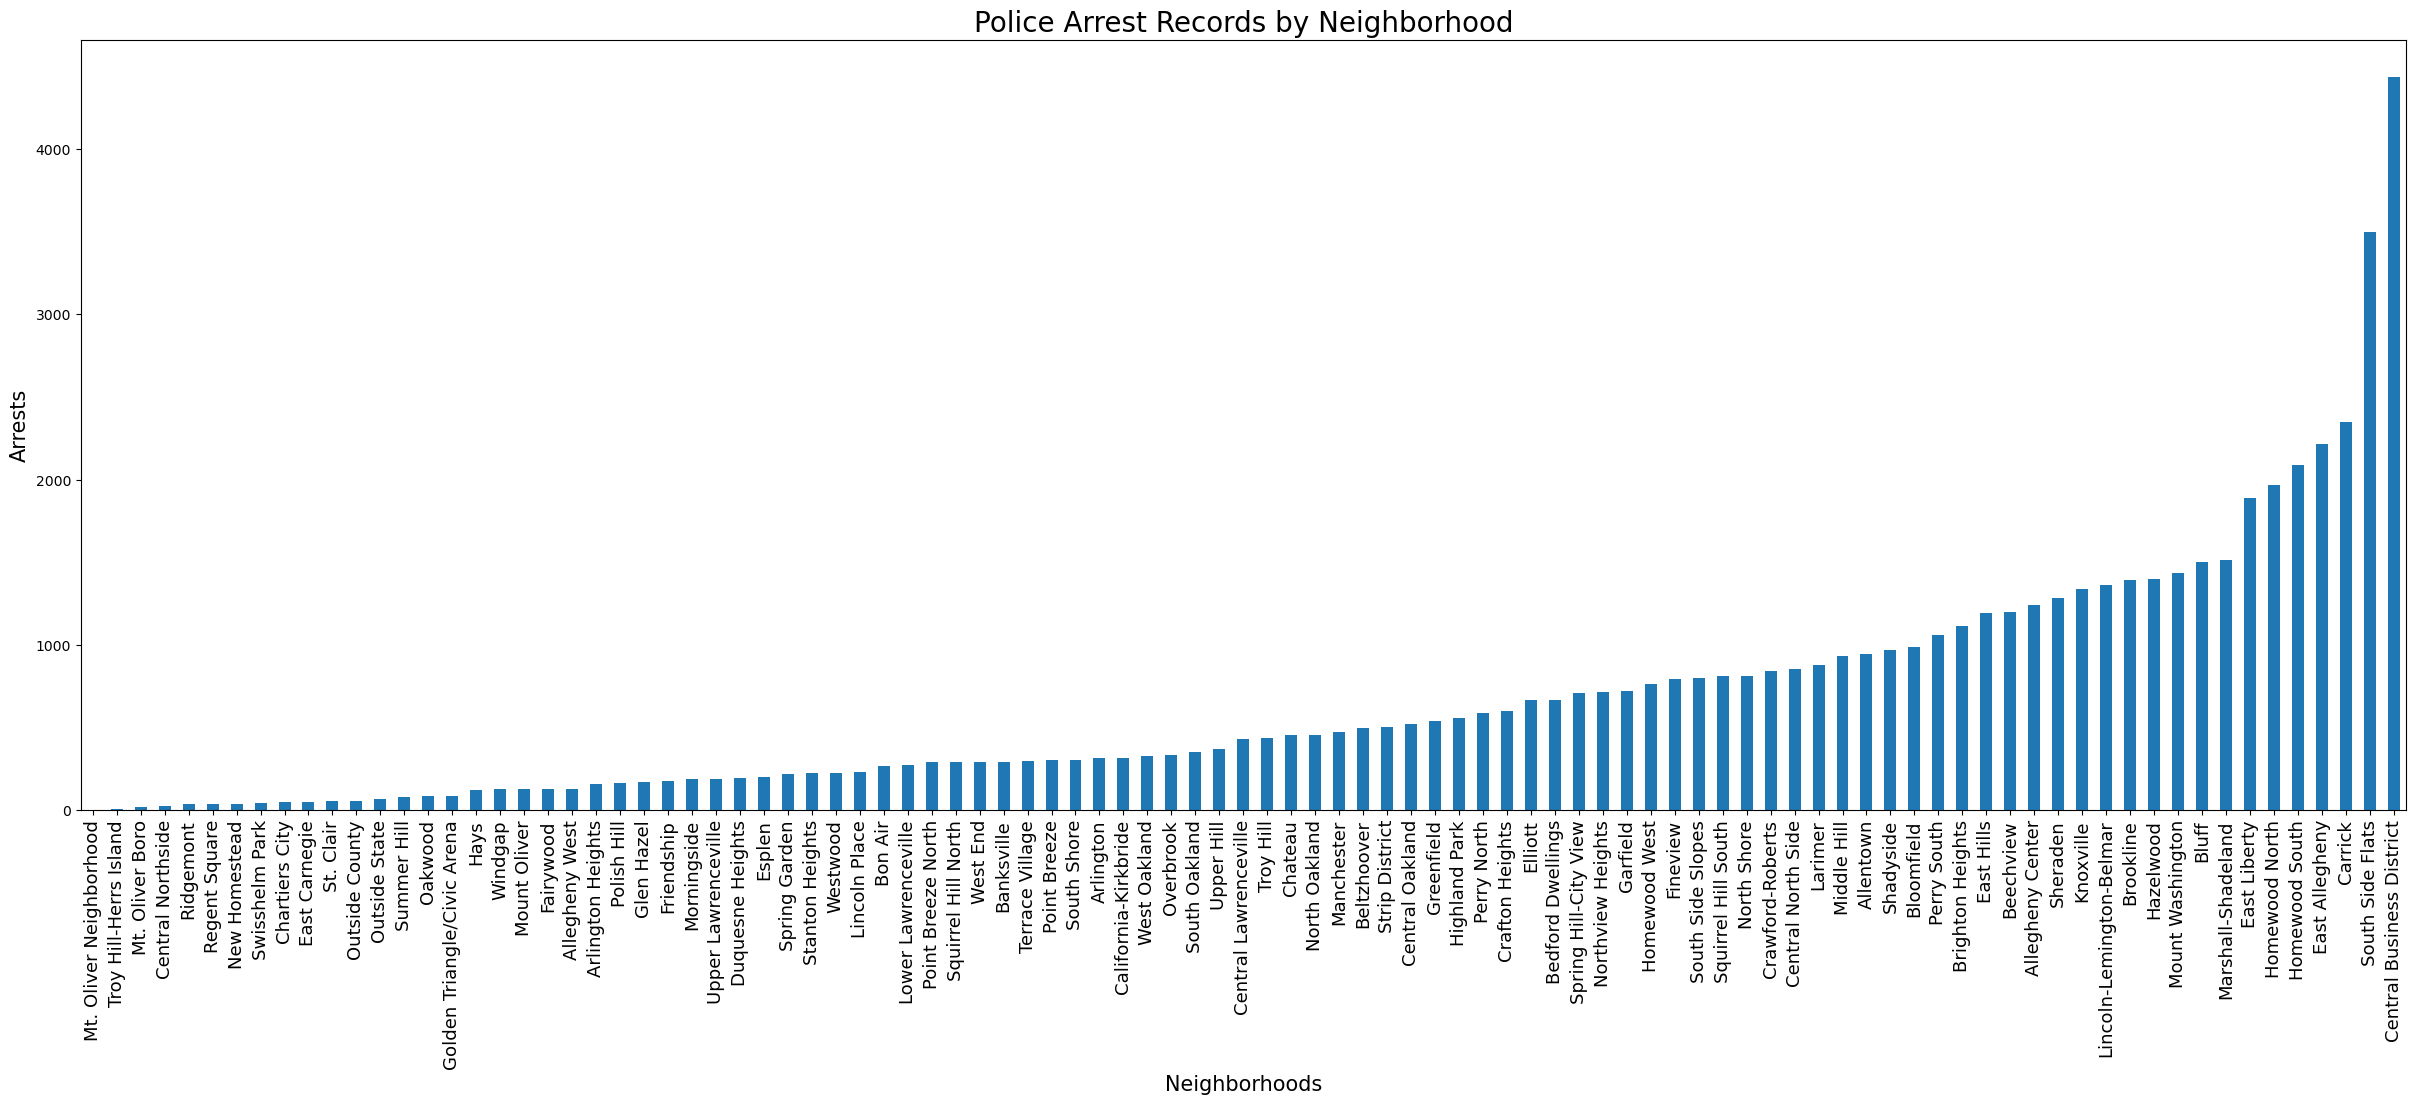

In [704]:
arrests_res['Arrests'].plot.bar(figsize=(30, 10), width=0.5)

# Adding labels and titles to the graph
plt.xlabel('Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Arrests', fontsize=15)
plt.title('Police Arrest Records by Neighborhood', fontsize=20)

## The Data: Fire Incidents

In [707]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [709]:
# Import data
file_path = 'Fire Incidents.csv'
fire = pd.read_csv(file_path)
fire.head() 

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.00,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,42003560600.00,NaN,NaN,NaN,3-16,40.44,-79.88
1,2,F180022058,111.00,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,42003561000.00,NaN,NaN,NaN,3-21,40.44,-79.88
2,3,F180022102,131.00,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.00,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.00,Fineview,6.00,25.00,42003250900.00,1.00,25.00,1.00,1-10,40.46,-80.01
4,5,F180021111,111.00,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.00,Fairywood,2.00,28.00,42003563000.00,5.00,28.00,6.00,1-16,40.45,-80.08


### Parse and Organize Data

In [712]:
fire = fire.rename(columns={'neighborhood': 'Neighborhood'})
fire = fire.groupby("Neighborhood").size().reset_index(name="Fire Incidents") # Group by neighborhood
fire = fire.sort_values(by="Fire Incidents", ascending=True) # Sort neighborhoods in lowest fire incidents to highest
fire 

,Neighborhood,Fire Incidents
52,Mount Oliver Borough,6
66,Regent Square,9
26,East Carnegie,11
67,Ridgemont,12
54,Mt. Oliver,12
...,...,...
38,Hazelwood,257
77,Squirrel Hill South,267
72,South Side Flats,288
16,Central Business District,289


In [714]:
# Creates another dataframe for graphing
fire_res = pd.DataFrame({
    'Neighborhood': fire['Neighborhood'],
    'Fire Incidents': fire['Fire Incidents']
})
fire_res = fire_res.set_index('Neighborhood')
fire_res

,Fire Incidents
Neighborhood,
Mount Oliver Borough,6
Regent Square,9
East Carnegie,11
Ridgemont,12
Mt. Oliver,12
...,...
Hazelwood,257
Squirrel Hill South,267
South Side Flats,288


### Plot Data

Text(0.5, 1.0, 'Fire Incidents by Neighborhood')

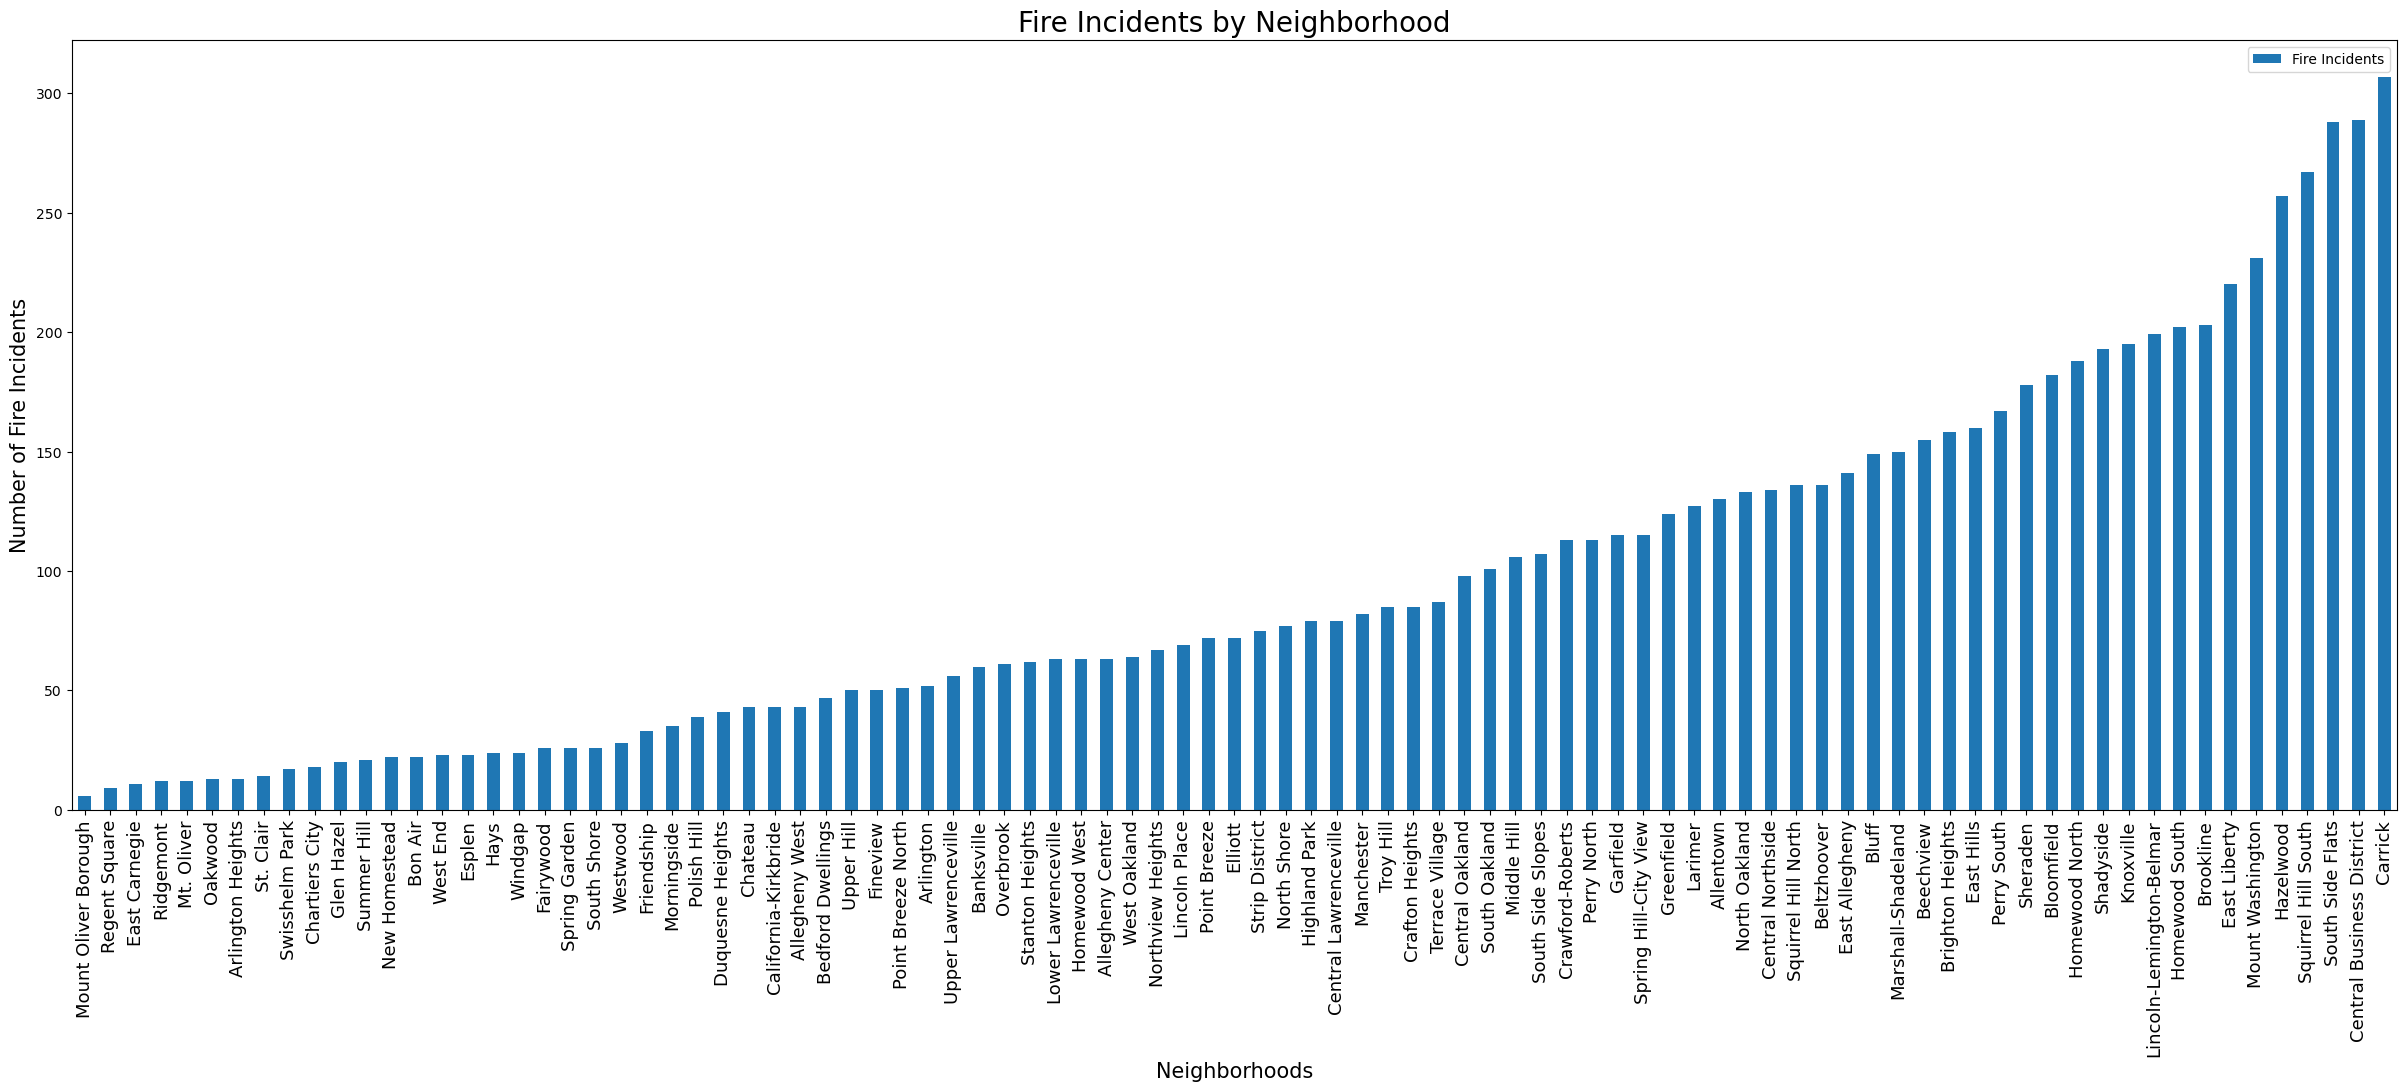

In [717]:
fire_res.plot.bar(figsize=(30,10), width=0.5)

# Adding labels and titles to the graph
plt.xlabel('Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Number of Fire Incidents', fontsize=15)
plt.title('Fire Incidents by Neighborhood', fontsize=20)

## The Data: Income

In [720]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensures that all float numbers are displayed with two decimal places
pd.options.display.float_format = '{:.2f}'.format

# Import data
income = pd.read_csv('income.csv')
income

,_id,Neighborhood,Id,estimate__aggregate_household_income_in_the_past_12_months__,margin_of_error__aggregate_household_income_in_the_past_12_m
0,1,Allegheny Center,1,28265700,8176700
1,2,Allegheny West,2,23755400,15159354
2,3,Allentown,3,40566300,8358735.28
3,4,Arlington,4,33111400,6248592.971
4,5,Arlington Heights,5,2515000,1056475
...,...,...,...,...,...
86,87,Upper Lawrenceville,87,60604600,14808774.52
87,88,West End,88,4884400,2447655
88,89,West Oakland,89,15820400,3620802.954
89,90,Westwood,90,90594300,11234701.15


### Parse and Organize Data for Total Income

In [723]:
income = income.rename(columns={
    'estimate__aggregate_household_income_in_the_past_12_months__': 'Total_income',
    'margin_of_error__aggregate_household_income_in_the_past_12_m': 'Margin_of_error'
})
income = income[['Neighborhood', 'Total_income', 'Margin_of_error']]
income = income[income['Total_income'] != '-']
income['Total_income'] = pd.to_numeric(income['Total_income'])
income['Margin_of_error'] = pd.to_numeric(income['Margin_of_error'])
income

,Neighborhood,Total_income,Margin_of_error
0,Allegheny Center,28265700,8176700.00
1,Allegheny West,23755400,15159354.00
2,Allentown,40566300,8358735.28
3,Arlington,33111400,6248592.97
4,Arlington Heights,2515000,1056475.00
...,...,...,...
86,Upper Lawrenceville,60604600,14808774.52
87,West End,4884400,2447655.00
88,West Oakland,15820400,3620802.95
89,Westwood,90594300,11234701.15


In [725]:
# Import individual's income data
individuals = pd.read_csv('income_individual.csv')
individuals

,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
0,1,Allegheny Center,1,733.00,103.00,462.00,94.00,271.00,87.00
1,2,Allegheny West,2,150.00,46.00,120.00,40.00,30.00,26.00
2,3,Allentown,3,1138.00,152.75,772.00,146.77,366.00,109.39
3,4,Arlington,4,685.00,105.37,566.00,104.59,119.00,44.45
4,5,Arlington Heights,5,170.00,69.00,96.00,58.00,74.00,52.00
...,...,...,...,...,...,...,...,...,...
86,87,Upper Lawrenceville,87,1262.00,144.10,937.00,138.11,325.00,110.06
87,88,West End,88,120.00,59.00,99.00,57.00,21.00,19.00
88,89,West Oakland,89,592.00,89.11,371.00,91.55,221.00,65.80
89,90,Westwood,90,1514.00,118.83,1255.00,130.87,259.00,79.20


### Parse and Organize Data for Total Population in Each Neighborhood

In [728]:
individuals = individuals.rename(columns={
    'Estimate; Total:': 'Total_individuals',
    'Margin of Error; Total:': 'Margin_of_error'})
individuals = individuals[['Neighborhood', 'Total_individuals', 'Margin_of_error']]
individuals = individuals[individuals['Total_individuals'] > 0.0]
individuals

,Neighborhood,Total_individuals,Margin_of_error
0,Allegheny Center,733.00,103.00
1,Allegheny West,150.00,46.00
2,Allentown,1138.00,152.75
3,Arlington,685.00,105.37
4,Arlington Heights,170.00,69.00
...,...,...,...
86,Upper Lawrenceville,1262.00,144.10
87,West End,120.00,59.00
88,West Oakland,592.00,89.11
89,Westwood,1514.00,118.83


### Standardize Data
Ensures that only neighborhoods present in both the `income` and `individuals` datasets are retained for further analysis.

In [731]:
common = set(income['Neighborhood']).intersection(individuals['Neighborhood'])
income = income[income['Neighborhood'].isin(common)]
individuals = individuals[individuals['Neighborhood'].isin(common)]
print(f'Both datasets have equal length? {len(income) == len(individuals)}')

Both datasets have equal length? True


### Calculate Average Income and Margin of Error
$$
\text{Average Income} = \frac{\text{Total Income}}{\text{Total Individuals}}
$$

$$
\text{Relative Margin of Error} = \sqrt{\left(\frac{\text{MoE of Income}}{\text{Income}}\right)^2 + \left(\frac{\text{MoE of Individuals}}{\text{Individuals}}\right)^2}  
$$

$$
\text{MoE of Average Income} = \text{Average Income}  \times \text{Combined Relative MoE}
$$

In [734]:
moe_income = income['Margin_of_error'] / income['Total_income']
moe_individuals = individuals['Margin_of_error'] / individuals['Total_individuals']
relative_moe = np.sqrt(moe_income ** 2 + moe_individuals ** 2)
average_income = income['Total_income'] / individuals['Total_individuals']
moe_average_income = relative_moe * average_income
income_res = pd.DataFrame({
    'Neighborhood': income['Neighborhood'],
    'Average Income': average_income,
    'Margin of Error': moe_average_income})
income_res = income_res.set_index('Neighborhood')
income_res = income_res.sort_values('Average Income', ascending=False)
income_res

,Average Income,Margin of Error
Neighborhood,,
Squirrel Hill North,164540.46,20748.32
Allegheny West,158369.33,112126.33
Strip District,156021.97,80139.82
Point Breeze,127711.29,15870.74
Central Business District,106215.40,28006.37
...,...,...
Northview Heights,19503.88,6964.31
Glen Hazel,17872.44,9855.83
Terrace Village,16806.45,3685.53


In [736]:
# This dataframe is here just for future use
ave_income_res = pd.DataFrame({
    'Neighborhood': income['Neighborhood'],
    'Average Income': average_income
})
ave_income_res

,Neighborhood,Average Income
0,Allegheny Center,38561.66
1,Allegheny West,158369.33
2,Allentown,35647.01
3,Arlington,48337.81
4,Arlington Heights,14794.12
...,...,...
86,Upper Lawrenceville,48022.66
87,West End,40703.33
88,West Oakland,26723.65
89,Westwood,59837.71


### Plot Data

Text(0.5, 1.0, 'Average Income by Neighborhood with Margin of Error')

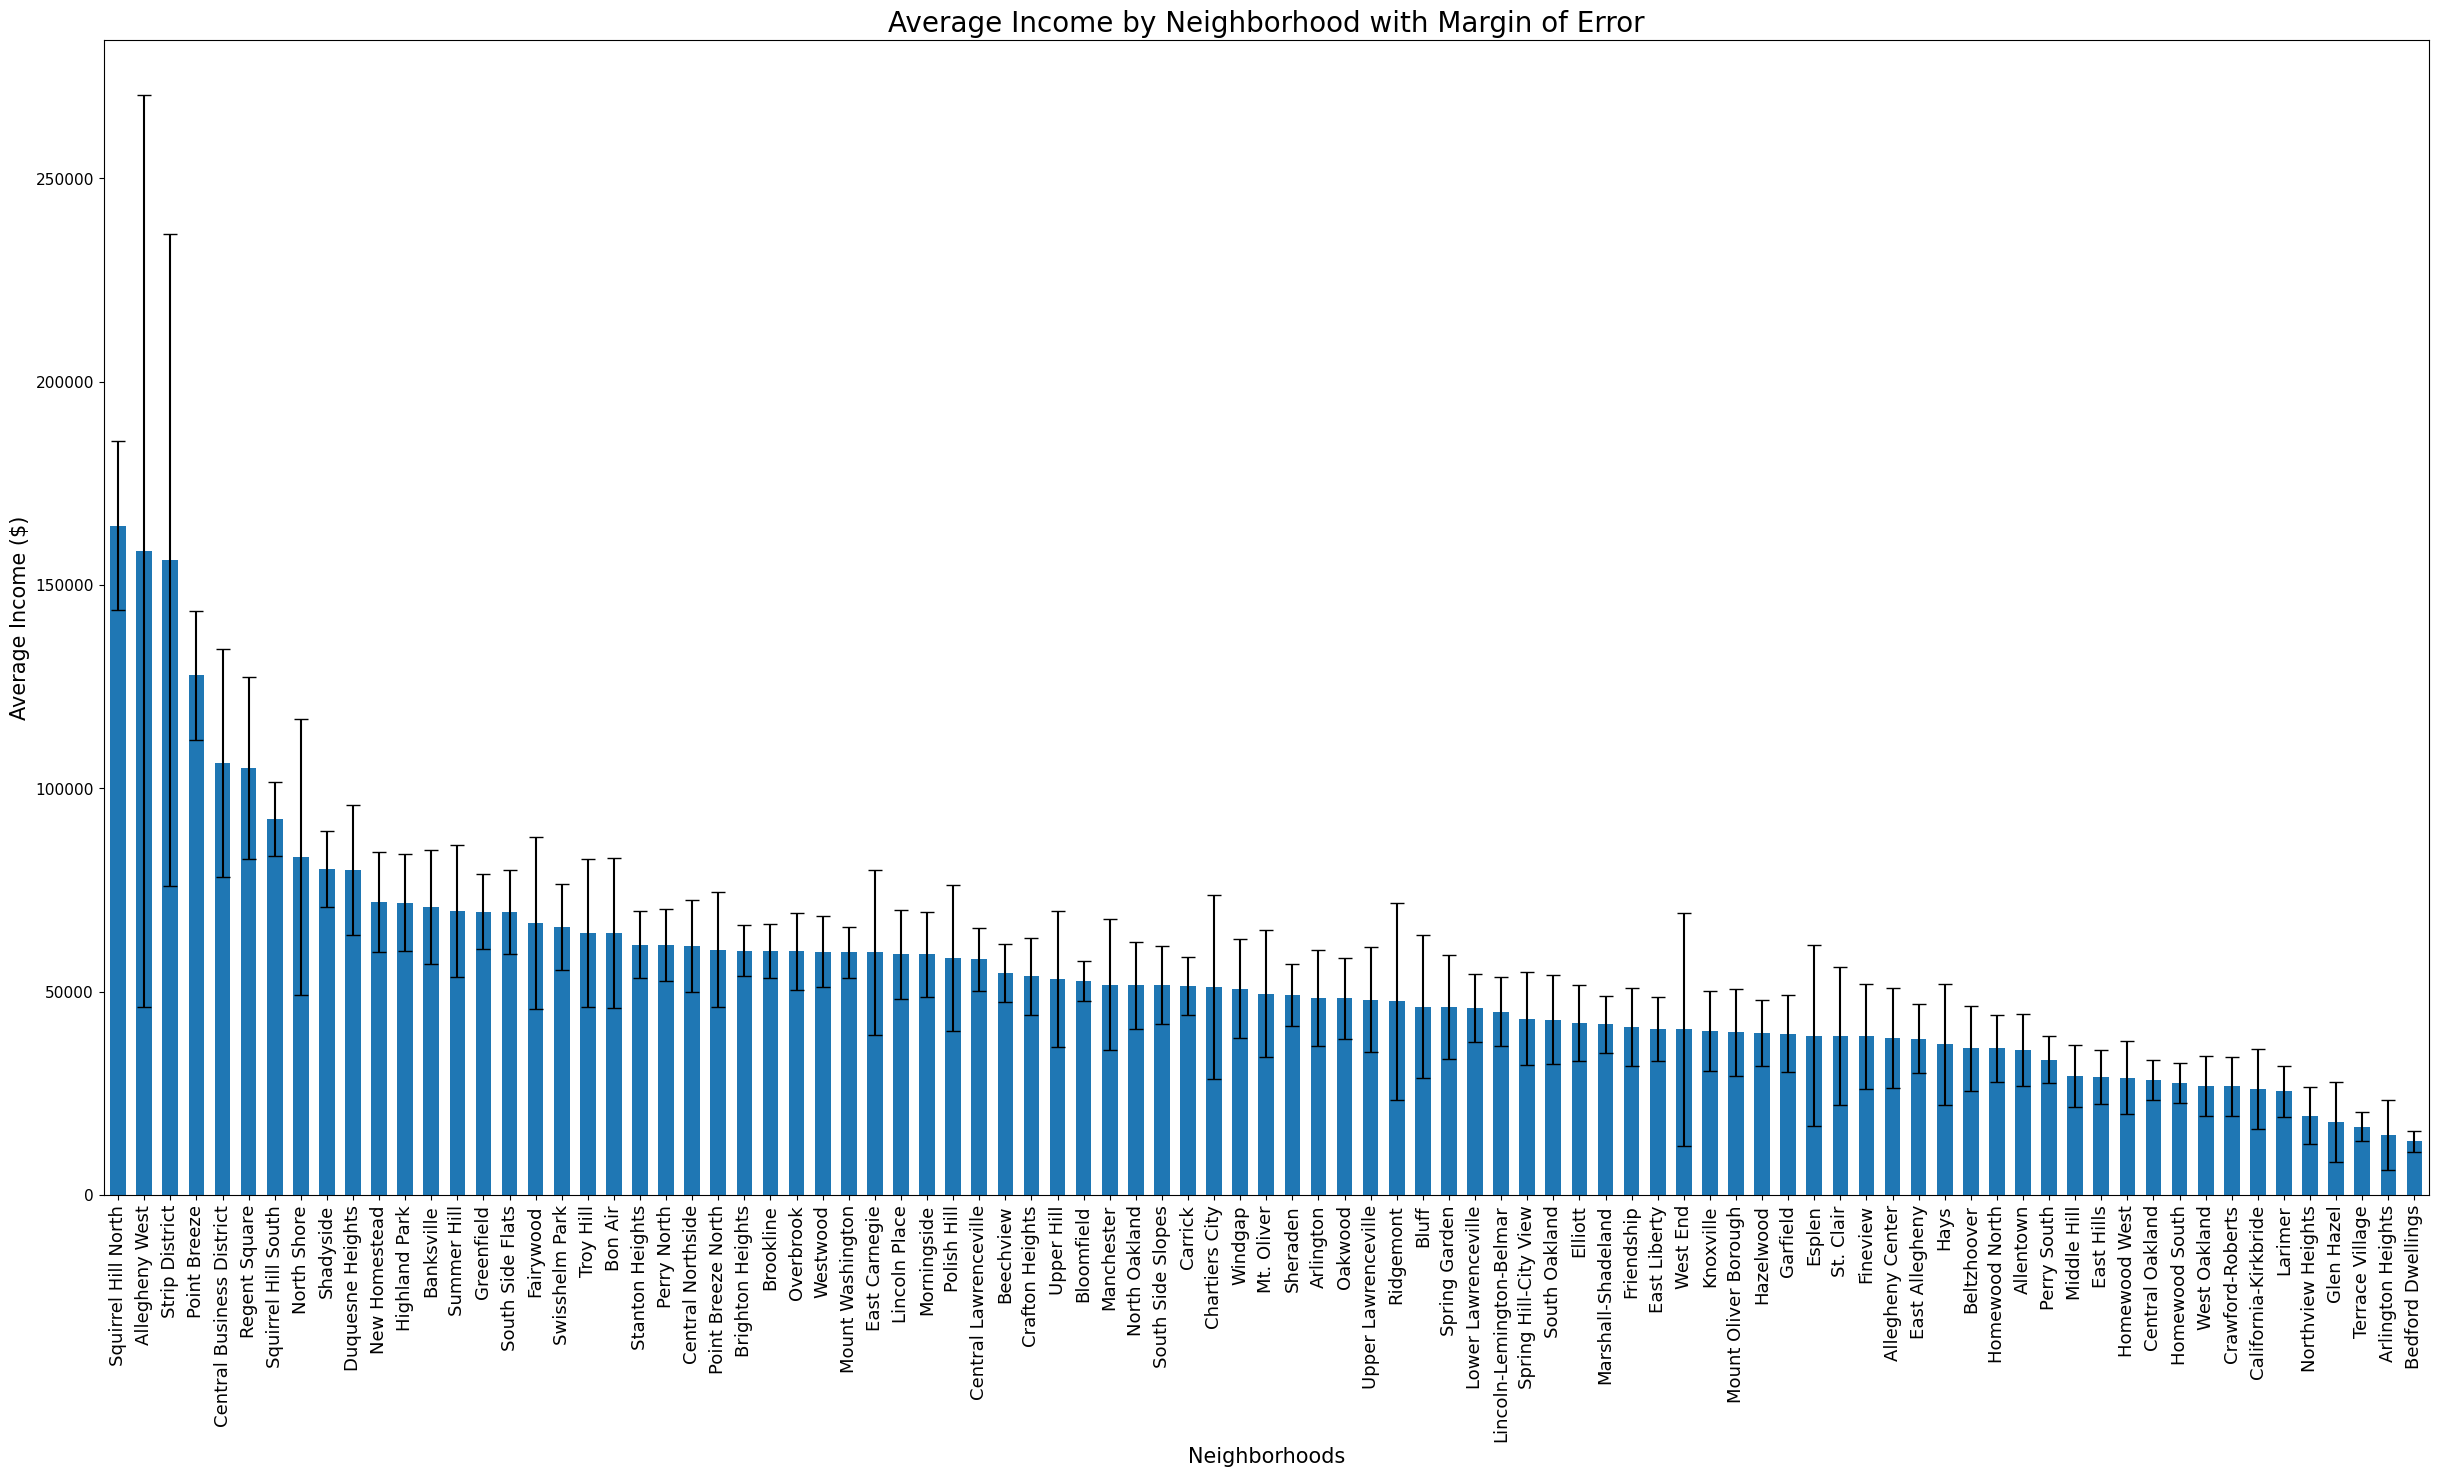

In [739]:
income_res['Average Income'].plot.bar(figsize=(30, 15), width=0.6, yerr=income_result['Margin of Error'], capsize=5)

# Adding labels and titles to the graph
plt.xlabel('Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Average Income ($)', fontsize=15)
plt.yticks(fontsize=11)
plt.title('Average Income by Neighborhood with Margin of Error', fontsize=20)

## Combining Data
Combine three datasets into one graph to evaluate which neighborhood is the best in Pittsburgh on a standard metrics

### Merge Data
Using `merge` to merge all three datasets with inner join operation. By including the parameter `how='inner'`, it ensures that only neighborhoods present in both DataFrames being merged are kept

In [743]:
merged = ave_income_res.merge(fire, on='Neighborhood', how='inner')
merged = merged.merge(arrests, on='Neighborhood', how='inner')
merged

,Neighborhood,Average Income,Fire Incidents,Arrests
0,Allegheny Center,38561.66,63,1244
1,Allegheny West,158369.33,43,130
2,Allentown,35647.01,130,947
3,Arlington,48337.81,52,312
4,Arlington Heights,14794.12,13,155
...,...,...,...,...
82,Upper Lawrenceville,48022.66,56,189
83,West End,40703.33,23,290
84,West Oakland,26723.65,64,325
85,Westwood,59837.71,28,226


### Normalize Data
Normalization ensures that all metrics contribute equally to the evaluation.
$$
\text{Normalized Value} = \frac{\text{Value} - \text{Min}}{\text{Max} - \text{Min}}
$$

In [746]:
normalized_income = (merged['Average Income'] - merged['Average Income'].min()) / (merged['Average Income'].max() - merged['Average Income'].min())

# Using inverse normalization because fewer fire incidents and arrests are better
normalized_fire = 1 - ((merged['Fire Incidents'] - merged['Fire Incidents'].min()) / (merged['Fire Incidents'].max() - merged['Fire Incidents'].min()))
normalized_arrests = 1 - ((merged['Arrests'] - merged['Arrests'].min()) / (merged['Arrests'].max() - merged['Arrests'].min()))

### Compute the Combined Score
We assign weights to each metric to conclude a score for each neighborhood, where $( w_1, w_2, w_3 )$ are the weights assigned to each metric.   
`Average Income:` 30%   
`Fire Incidents:` 35%   
`Arrests:` 35%
$$
\text{Combined Score} = w_1 \cdot \text{Normalized Income} + w_2 \cdot \text{Normalized Fire Incidents} + w_3 \cdot \text{Normalized Arrests}
$$

In [749]:
combined_res = 0.30 * normalized_income + 0.35 * normalized_fire + 0.35 * normalized_arrests
final = pd.DataFrame({
    'Neighborhood': merged['Neighborhood'],
    'Combined Score': combined_res
})
final = final.set_index('Neighborhood')
final = final.sort_values(by='Combined Score', ascending=False)
final

,Combined Score
Neighborhood,
Allegheny West,0.94
Regent Square,0.88
Strip District,0.87
Point Breeze,0.83
Squirrel Hill North,0.83
...,...
Hazelwood,0.35
Homewood South,0.34
Carrick,0.24


### Plot Data

Text(0.5, 1.0, 'Overall Neighborhood Scores in Pittsburgh')

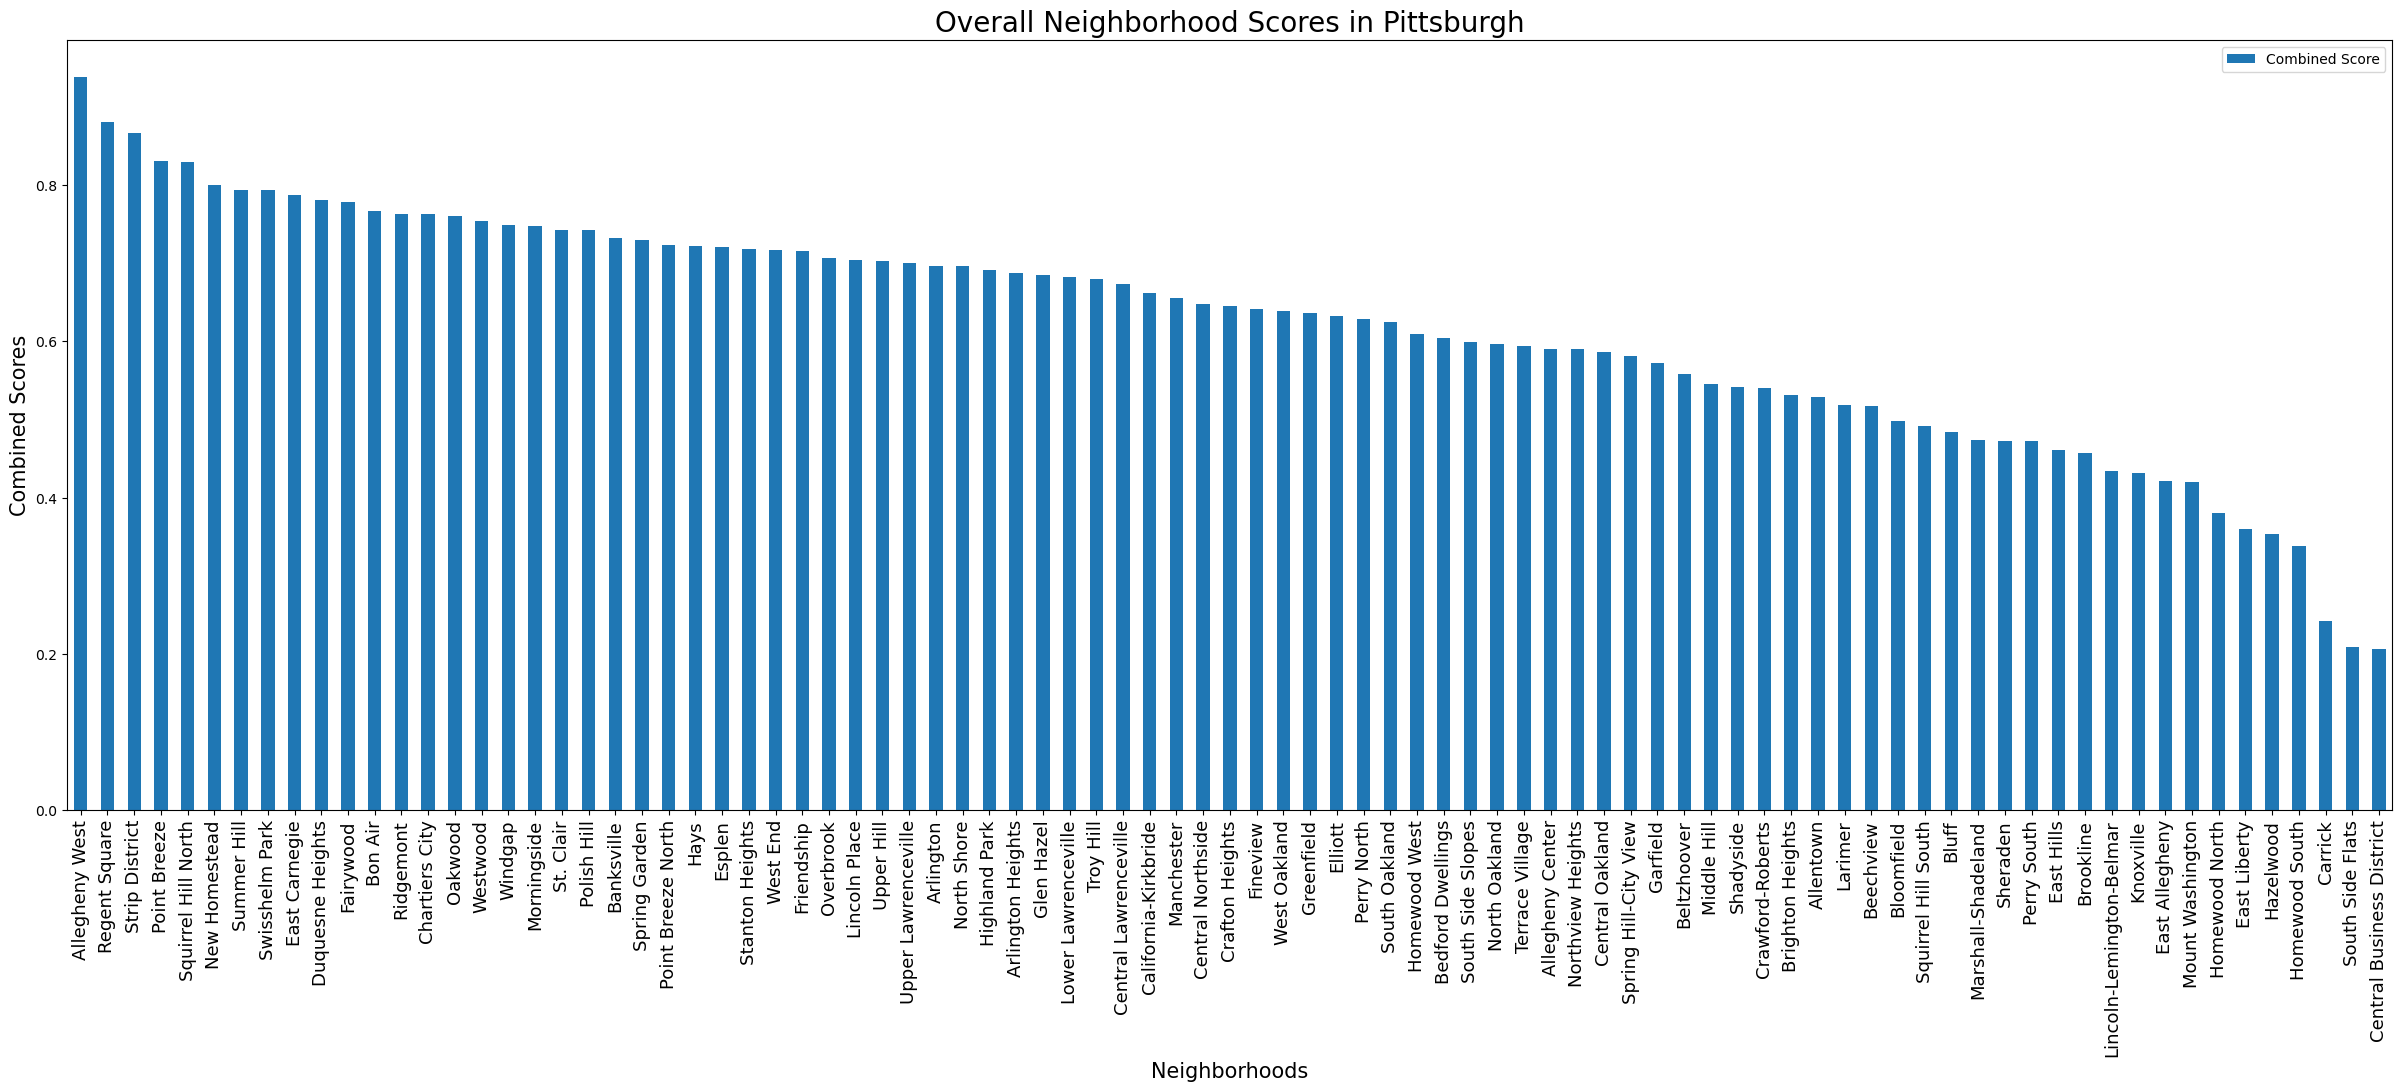

In [752]:
final.plot.bar(figsize=(30, 10), width=0.5)

# Adding labels and titles to the graph
plt.xlabel('Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Combined Scores', fontsize=15)
plt.title('Overall Neighborhood Scores in Pittsburgh', fontsize=20)

# The Best Neighborhood
Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data-driven argument.

# Conclusion
Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.